In [25]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [30]:
img = Image.open('earth.png')
img_array = np.array(Image.open('earth.png'))

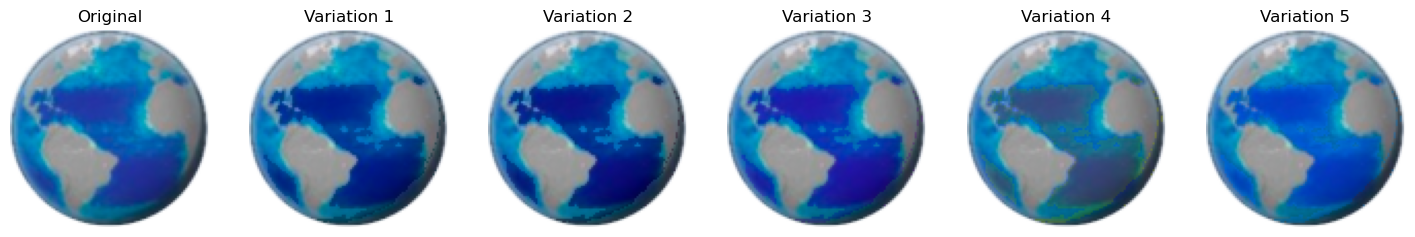

In [32]:
# It looks like there was an issue with the color manipulation. Let's try a different approach
# to vary the colors in the ocean area while keeping the land gray.

def generate_variations(img_array, num_variations=5):
    variations = []
    # Mask for ocean areas (where blue is prominent)
    ocean_mask = (img_array[:,:,2] > 100) & (img_array[:,:,0] < 100) & (img_array[:,:,1] < 100)
    
    for i in range(num_variations):
        # Create random color shifts
        color_shift = np.random.randint(-50, 50, size=(3,), dtype=np.int16)
        # Apply color shift to the blue parts of the image (ocean)
        variation = img_array.copy().astype(np.int16)
        for channel in range(3):
            variation[:,:,channel] += ocean_mask * color_shift[channel]
        variation = np.clip(variation, 0, 255).astype(np.uint8)
        variations.append(variation)
    return variations

# Generate color variations
variations = generate_variations(img_array)

# Plot the original and variations
fig, axes = plt.subplots(1, 6, figsize=(18, 3))
axes[0].imshow(img)
axes[0].set_title('Original')
axes[0].axis('off')

for i, variation in enumerate(variations):
    axes[i+1].imshow(variation)
    axes[i+1].set_title(f'Variation {i+1}')
    axes[i+1].axis('off')

plt.show()


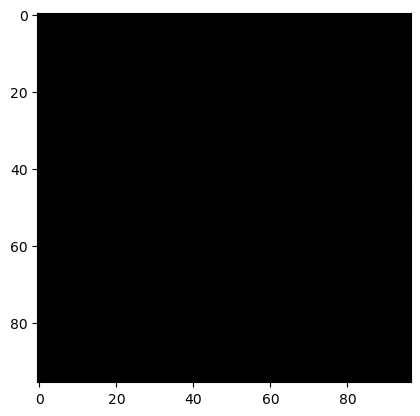

In [18]:
plt.imshow(variations[0])

In [33]:
# Function to save images with transparent background
def save_variations_with_transparency(variations, original_image, output_dir):
    # Ensure the directory exists
    import os
    os.makedirs(output_dir, exist_ok=True)

    # Process each variation
    for i, variation in enumerate(variations):
        # Convert to RGBA
        variation_rgba = Image.fromarray(variation).convert("RGBA")
        original_rgba = original_image.convert("RGBA")
        
        # Create a mask for the gray land areas (to make them transparent)
        mask = np.all(np.array(original_rgba)[:, :, :3] == [128, 128, 128], axis=-1)
        
        # Apply mask to make gray areas transparent
        transparent_variation = np.array(variation_rgba)
        transparent_variation[mask, 3] = 0
        
        # Save the image
        output_path = os.path.join(output_dir, f'variation_{i+1}.png')
        Image.fromarray(transparent_variation).save(output_path)

# Set the output directory
output_directory = 'variations'

# Save the variations with transparent background
save_variations_with_transparency(variations, earth, output_directory)